In [4]:
import glob
import pandas as pd
import numpy as np

In [5]:
test_case_1 = glob.glob('테스트/좌-우/*.csv')
test_case_2 = glob.glob('테스트/우-좌/*.csv')
test_case_3 = glob.glob('테스트/시계방향/*.csv')
test_case_4 = glob.glob('테스트/시계반대방향/*.csv')

In [6]:
len(test_case_1), len(test_case_2), len(test_case_3), len(test_case_4)

(200, 200, 200, 200)

In [7]:
# df_tc_1 = pd.read_csv(i, names=['a-b','c-d','label']).shape

In [8]:
test_set = pd.read_csv(test_case_2[0], names=['a-b','c-d'])

In [9]:
test_set.head()

,a-b,c-d
0,-0.027965,0.041223
1,-0.028218,0.042603
2,-0.028825,0.043931
3,-0.029800,0.045180
4,-0.031084,0.046341


In [10]:
pd.DataFrame([[1],[2],[3],[4],[5],[6],[7]]).sample(n=7).sort_index()

,0
0,1
1,2
2,3
3,4
4,5
5,6
6,7


In [11]:
for i in file_lst[1:]:
    print(len(random.sample(list(pd.read_csv(i, names=['a-b','c-d','label'])['a-b'].values), 1000)))

NameError: name 'file_lst' is not defined

### main code

In [12]:
total_data = test_case_1 + test_case_2 + test_case_3 + test_case_4

In [13]:
dataset = np.zeros((len(total_data), 100, 2))

In [14]:
dataset.shape

(800, 100, 2)

In [15]:
for i, data in enumerate(total_data):
    # print(pd.read_csv(i, names=['a-b','c-d','label']).sample(n=1000).sort_index().iloc[:,:2].shape)
    dataset[i] = pd.read_csv(data, names=['a-b','c-d','label']).sample(n=100).sort_index().iloc[:,:2]

In [16]:
label = np.array([[1, 0, 0 ,0 ]] * len(test_case_1) + [[0, 1, 0, 0]] * len(test_case_2) + [[0, 0, 1, 0]] * len(test_case_3) + [[0, 0, 0, 1]] * len(test_case_4))
#label.conca

In [17]:
dataset.shape, label.shape

((800, 100, 2), (800, 4))

In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [19]:
sc = MinMaxScaler()

In [20]:
sc_dataset = dataset[:]

In [21]:
for num, i in enumerate(dataset):
    sc_dataset[num] = sc.fit_transform(i)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(dataset, label, random_state=0, test_size=0.3)

In [24]:
X_train.shape

(560, 100, 2)

In [25]:
import matplotlib.pyplot as plt

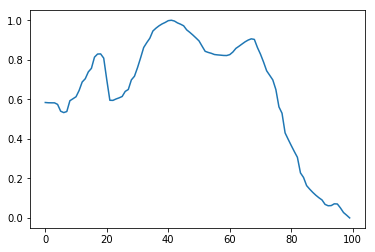

In [26]:
plt.plot(dataset[120,:,0])

In [27]:
from keras.layers import LSTM, Dense
from keras.models import Sequential
import keras.backend as K
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score

Using TensorFlow backend.


In [28]:
callback = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.000001), 
    #ModelCheckpoint(filepath='./weights.h5', save_best_only=True),
    EarlyStopping(monitor='val_acc', restore_best_weights=True, patience=5)
]

In [29]:
K.clear_session()

In [30]:
model_once = Sequential()

In [31]:
model_once.add(LSTM(20, input_shape=(100,2)))
model_once.add(Dense(4))
model_once.compile(loss='mse', optimizer=Adam(lr=0.01), metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [32]:
model_once.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                1840      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 84        
Total params: 1,924
Trainable params: 1,924
Non-trainable params: 0
_________________________________________________________________


In [33]:
model_once.fit(X_train, y_train, epochs=25)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
560/560 [==============================] - 7s 13ms/step - loss: 0.1507 - acc: 0.5875
Epoch 2/25
560/560 [==============================] - 3s 5ms/step - loss: 0.0914 - acc: 0.8000
Epoch 3/25
560/560 [==============================] - 3s 5ms/step - loss: 0.0881 - acc: 0.7750
Epoch 4/25
560/560 [==============================] - 3s 5ms/step - loss: 0.0903 - acc: 0.7946
Epoch 5/25
560/560 [==============================] - 3s 5ms/step - loss: 0.0737 - acc: 0.8393
Epoch 6/25
560/560 [==============================] - 3s 5ms/step - loss: 0.0649 - acc: 0.8429
Epoch 7/25
560/560 [==============================] - 3s 5ms/step - loss: 0.0675 - acc: 0.8464
Epoch 8/25
560/560 [==============================] - 3s 5ms/step - loss: 0.0595 - acc: 0.8554
Epoch 9/25
560/560 [==============================] - 3s 5ms/step - loss: 0.0485 - acc: 0.9054
Epoch 10/25
560/560 [==============================] - 3s 5ms/step - loss: 0.1474 - acc: 0.5982


In [34]:
model_once.evaluate(X_test, y_test)

240/240 [==============================] - 1s 3ms/step


[0.047177809725205105, 0.9166666666666666]

In [213]:
model.load_weights('./weights_f.h5')

AttributeError: 'KerasClassifier' object has no attribute 'load_weights'

In [214]:
model.evaluate(X_test, y_test)

AttributeError: 'KerasClassifier' object has no attribute 'evaluate'

In [215]:
from sklearn.preprocessing import MinMaxScaler

In [216]:
scaler = MinMaxScaler()

In [217]:
sc_dataset = scaler.fit_transform(dataset[0,:,:])

### K-Fold

In [35]:
def create_model():
    model = Sequential()
    model.add(LSTM(40, input_shape=(100,2)))
    model.add(Dense(4))
    model.compile(loss='mse', optimizer=Adam(lr=0.001), metrics=['acc'])
    return model

In [36]:
seed = 7
np.random.seed(seed)

In [37]:
model = KerasClassifier(build_fn=create_model, epochs=30)

In [38]:
kfold = KFold(n_splits=4, shuffle=True, random_state=seed)
results = cross_val_score(model, dataset, label, cv=kfold)

Epoch 1/30
600/600 [==============================] - 4s 6ms/step - loss: 0.2141 - acc: 0.3183
Epoch 2/30
600/600 [==============================] - 3s 5ms/step - loss: 0.1675 - acc: 0.4683
Epoch 3/30
600/600 [==============================] - 3s 5ms/step - loss: 0.1392 - acc: 0.5900
Epoch 4/30
600/600 [==============================] - 3s 5ms/step - loss: 0.1164 - acc: 0.7200
Epoch 5/30
600/600 [==============================] - 3s 5ms/step - loss: 0.0944 - acc: 0.8033
Epoch 6/30
600/600 [==============================] - 3s 5ms/step - loss: 0.0842 - acc: 0.8200
Epoch 7/30
600/600 [==============================] - 3s 5ms/step - loss: 0.0743 - acc: 0.8233
Epoch 8/30
600/600 [==============================] - 3s 5ms/step - loss: 0.0660 - acc: 0.8300
Epoch 9/30
600/600 [==============================] - 3s 5ms/step - loss: 0.0576 - acc: 0.8567
Epoch 10/30
600/600 [==============================] - 3s 5ms/step - loss: 0.0517 - acc: 0.8550
Epoch 11/30
600/600 [============================

600/600 [==============================] - 3s 5ms/step - loss: 0.0142 - acc: 0.9800
Epoch 26/30
600/600 [==============================] - 3s 5ms/step - loss: 0.0146 - acc: 0.9700
Epoch 27/30
600/600 [==============================] - 3s 5ms/step - loss: 0.0118 - acc: 0.9800
Epoch 28/30
600/600 [==============================] - 3s 5ms/step - loss: 0.0124 - acc: 0.9867
Epoch 29/30
600/600 [==============================] - 3s 5ms/step - loss: 0.0121 - acc: 0.9833
Epoch 30/30
200/200 [==============================] - 1s 3ms/step
Epoch 1/30
600/600 [==============================] - 4s 7ms/step - loss: 0.2148 - acc: 0.3417
Epoch 2/30
600/600 [==============================] - 3s 5ms/step - loss: 0.1624 - acc: 0.4567
Epoch 3/30
600/600 [==============================] - 3s 5ms/step - loss: 0.1378 - acc: 0.6417
Epoch 4/30
600/600 [==============================] - 3s 5ms/step - loss: 0.1130 - acc: 0.7783
Epoch 5/30
600/600 [==============================] - 3s 5ms/step - loss: 0.0898 - ac

In [39]:
results, results.mean()

(array([0.975, 0.58 , 0.975, 0.98 ]), 0.8775)

In [48]:
import tensorflow as tf

In [49]:
y_test.shape

(240, 4)

In [50]:
y_true = np.argmax(y_test, axis=1).reshape(-1, 1)

In [51]:
y_pred=model_once.predict_classes(X_test)
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred)

Instructions for updating:
Use tf.cast instead.


In [52]:
print(tf.Session().run(con_mat))

[[53  2  0  1]
 [ 0 58  1  3]
 [ 0  1 61  0]
 [ 1  2  0 57]]


In [241]:
from keras.utils import plot_model
from keras.models import load_model


In [242]:
def create_model():
    model = Sequential()
    model.add(LSTM(40, input_shape=(100,2)))
    model.add(Dense(4))
    model.compile(loss='mse', optimizer=Adam(lr=0.001), metrics=['acc'])
    return model

In [245]:
model_once
plot_model(model_once, to_file='./model.png')

In [ ]:
model_once